<a href="https://colab.research.google.com/github/Aditya02sant/OIBSIP/blob/main/TASK4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install and Import Necessary Libraries

In [1]:

!pip install pandas scikit-learn matplotlib seaborn joblib wordcloud --quiet


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from wordcloud import WordCloud


Upload and Load the Dataset

In [2]:

from google.colab import files
uploaded = files.upload()


dataset = pd.read_csv('spam.csv', encoding='latin-1')


dataset = dataset.rename(columns={"v1": "label", "v2": "message"})
dataset = dataset[["label", "message"]]


dataset['label'] = dataset['label'].map({'ham': 0, 'spam': 1})


print(dataset.head())
print("Dataset shape:", dataset.shape)


Saving spam.csv to spam.csv
   label                                            message
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...
Dataset shape: (5572, 2)


Preprocess and Split the Data

In [10]:

X = dataset['message']
y = dataset['label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data: {X_train.shape}")
print(f"Testing data: {X_test.shape}")


Training data: (4457,)
Testing data: (1115,)


Text Vectorization

In [11]:

vectorizer = CountVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

print("Vectorization complete.")


Vectorization complete.


Train the Model

In [12]:

model = MultinomialNB()
model.fit(X_train_transformed, y_train)


y_pred = model.predict(X_test_transformed)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9838565022421525

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



Save and Load Model Functions

In [6]:

def save_model(model, vectorizer):
    joblib.dump(model, 'spam_detector_model.pkl')
    joblib.dump(vectorizer, 'vectorizer.pkl')
    print("Model and vectorizer saved!")


def load_model():
    model = joblib.load('spam_detector_model.pkl')
    vectorizer = joblib.load('vectorizer.pkl')
    print("Model and vectorizer loaded!")
    return model, vectorizer


save_model(model, vectorizer)


Model and vectorizer saved!


Visualize Most Common Words

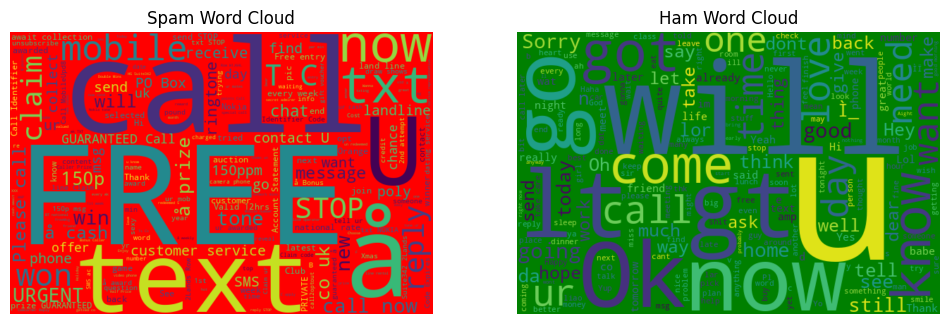

In [7]:

def generate_wordclouds(data):
    spam_words = ' '.join(data[data['label'] == 1]['message'])
    ham_words = ' '.join(data[data['label'] == 0]['message'])

    spam_cloud = WordCloud(width=600, height=400, background_color='red').generate(spam_words)
    ham_cloud = WordCloud(width=600, height=400, background_color='green').generate(ham_words)


    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(spam_cloud, interpolation='bilinear')
    plt.title('Spam Word Cloud')
    plt.axis('off')


    plt.subplot(1, 2, 2)
    plt.imshow(ham_cloud, interpolation='bilinear')
    plt.title('Ham Word Cloud')
    plt.axis('off')

    plt.show()

generate_wordclouds(dataset)


Analyze False Positives and Negatives

In [8]:

def analyze_errors(y_test, y_pred, X_test):
    errors = pd.DataFrame({'Message': X_test, 'Actual': y_test, 'Predicted': y_pred})
    false_positives = errors[(errors['Actual'] == 0) & (errors['Predicted'] == 1)]
    false_negatives = errors[(errors['Actual'] == 1) & (errors['Predicted'] == 0)]

    print(f"False Positives ({len(false_positives)}):")
    print(false_positives)
    print("\nFalse Negatives ({len(false_negatives)}):")
    print(false_negatives)


analyze_errors(y_test.to_numpy(), y_pred, X_test.to_numpy())


False Positives (2):
                                               Message  Actual  Predicted
100                             I liked the new mobile       0          1
786  We have sent JD for Customer Service cum Accou...       0          1

False Negatives ({len(false_negatives)}):
                                                Message  Actual  Predicted
32    Hi I'm sue. I am 20 years old and work as a la...       1          0
225                                  ringtoneking 84484       1          0
397   Can U get 2 phone NOW? I wanna chat 2 set up m...       1          0
448   Email AlertFrom: Jeri StewartSize: 2KBSubject:...       1          0
522   Hello darling how are you today? I would love ...       1          0
558   LookAtMe!: Thanks for your purchase of a video...       1          0
652   thesmszone.com lets you send free anonymous an...       1          0
669   Hi its LUCY Hubby at meetins all day Fri & I w...       1          0
691   Ever thought about living a good 

 Test with Custom Email

In [9]:

def predict_email(text):
    text_transformed = vectorizer.transform([text])
    prediction = model.predict(text_transformed)
    return "Spam" if prediction[0] == 1 else "Ham"


model, vectorizer = load_model()


email = "Congratulations! You’ve won $1,000,000! Claim now."
print("This email is:", predict_email(email))


Model and vectorizer loaded!
This email is: Spam
